### 10 April Assignment Solution

### Q1. Probability that an employee is a smoker given that they use the health insurance plan

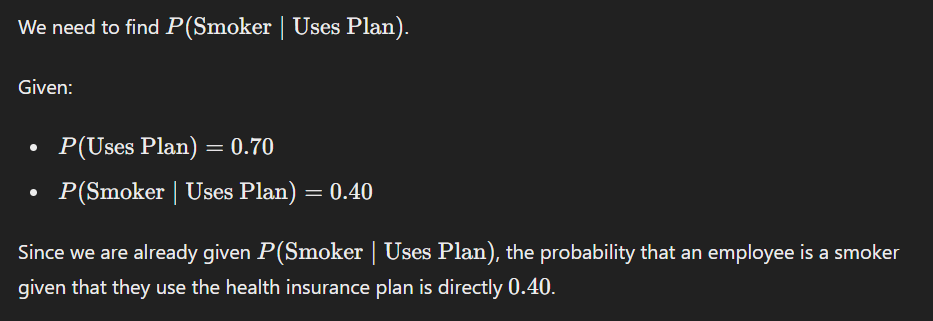


### Q2. Difference between Bernoulli Naive Bayes and Multinomial Naive Bayes

1. **Bernoulli Naive Bayes**:
   - Assumes that all features are binary (0 or 1).
   - Suitable for tasks where the presence or absence of a feature is more informative than its frequency.
   - Used mainly in text classification tasks where the presence of a word (rather than the count) is used.

2. **Multinomial Naive Bayes**:
   - Assumes that features are drawn from a multinomial distribution (counts of events).
   - Suitable for tasks where the frequency of occurrence of a feature matters.
   - Commonly used in text classification tasks where word counts are used as features.


### Q3. How does Bernoulli Naive Bayes handle missing values?

Bernoulli Naive Bayes does not inherently handle missing values. However, there are some strategies that can be employed to deal with missing values before applying the Bernoulli Naive Bayes algorithm:

1. **Imputation**:
   - Replace missing values with the most frequent value (mode) of the feature.
   - Replace missing values with a specific value (e.g., 0) assuming the missing feature is absent.

2. **Omission**:
   - Remove instances with missing values, though this can result in loss of data and information.



### Q4. Can Gaussian Naive Bayes be used for multi-class classification?

Yes, Gaussian Naive Bayes can be used for multi-class classification. It assumes that the features follow a Gaussian (normal) distribution and can handle multiple classes by applying the Gaussian distribution assumption to each class.



In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9777777777777777

In [3]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [12]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

# fetch dataset 
spambase = fetch_ucirepo(id=94) 



# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 

df = pd.DataFrame(X)  

dfy = pd.DataFrame(y)


,Class
0,1
1,1
2,1
3,1
4,1
...,...
4596,0
4597,0
4598,0
4599,0


In [ ]:
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings("ignore")

In [27]:
# Standardize the features for GaussianNB

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features for GaussianNB
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Create the classifiers
bernoulli_nb = BernoulliNB()
multinomial_nb = MultinomialNB()
gaussian_nb = GaussianNB()

In [29]:

# Perform 10-fold cross-validation predictions on the training set
y_train_pred_bernoulli = cross_val_predict(bernoulli_nb, X_train, y_train, cv=10)
y_train_pred_multinomial = cross_val_predict(multinomial_nb, X_train, y_train, cv=10)
y_train_pred_gaussian = cross_val_predict(gaussian_nb, X_train_scaled, y_train, cv=10)


In [30]:

# Train the classifiers on the training set
bernoulli_nb.fit(X_train, y_train)
multinomial_nb.fit(X_train, y_train)
gaussian_nb.fit(X_train_scaled, y_train)

# Predict on the test set
y_test_pred_bernoulli = bernoulli_nb.predict(X_test)
y_test_pred_multinomial = multinomial_nb.predict(X_test)
y_test_pred_gaussian = gaussian_nb.predict(X_test_scaled)


In [33]:

# Calculate performance metrics
def get_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1


In [37]:

train_metrics_bernoulli = get_metrics(y_train, y_train_pred_bernoulli)
train_metrics_multinomial = get_metrics(y_train, y_train_pred_multinomial)
train_metrics_gaussian = get_metrics(y_train, y_train_pred_gaussian)

test_metrics_bernoulli = get_metrics(y_test, y_test_pred_bernoulli)
test_metrics_multinomial = get_metrics(y_test, y_test_pred_multinomial)
test_metrics_gaussian = get_metrics(y_test, y_test_pred_gaussian)


In [38]:

# Print the results
print("Train Metrics:")
print("Bernoulli Naive Bayes: Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%, F1 Score: {:.2f}%".format(
    train_metrics_bernoulli[0] * 100, train_metrics_bernoulli[1] * 100, train_metrics_bernoulli[2] * 100, train_metrics_bernoulli[3] * 100))
print("Multinomial Naive Bayes: Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%, F1 Score: {:.2f}%".format(
    train_metrics_multinomial[0] * 100, train_metrics_multinomial[1] * 100, train_metrics_multinomial[2] * 100, train_metrics_multinomial[3] * 100))
print("Gaussian Naive Bayes: Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%, F1 Score: {:.2f}%".format(
    train_metrics_gaussian[0] * 100, train_metrics_gaussian[1] * 100, train_metrics_gaussian[2] * 100, train_metrics_gaussian[3] * 100))

print("\nTest Metrics:")
print("Bernoulli Naive Bayes: Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%, F1 Score: {:.2f}%".format(
    test_metrics_bernoulli[0] * 100, test_metrics_bernoulli[1] * 100, test_metrics_bernoulli[2] * 100, test_metrics_bernoulli[3] * 100))
print("Multinomial Naive Bayes: Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%, F1 Score: {:.2f}%".format(
    test_metrics_multinomial[0] * 100, test_metrics_multinomial[1] * 100, test_metrics_multinomial[2] * 100, test_metrics_multinomial[3] * 100))
print("Gaussian Naive Bayes: Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%, F1 Score: {:.2f}%".format(
    test_metrics_gaussian[0] * 100, test_metrics_gaussian[1] * 100, test_metrics_gaussian[2] * 100, test_metrics_gaussian[3] * 100))

Train Metrics:
Bernoulli Naive Bayes: Accuracy: 88.73%, Precision: 88.39%, Recall: 81.31%, F1 Score: 84.70%
Multinomial Naive Bayes: Accuracy: 79.07%, Precision: 74.02%, Recall: 70.06%, F1 Score: 71.99%
Gaussian Naive Bayes: Accuracy: 80.56%, Precision: 67.55%, Recall: 94.98%, F1 Score: 78.95%

Test Metrics:
Bernoulli Naive Bayes: Accuracy: 87.91%, Precision: 88.83%, Recall: 81.28%, F1 Score: 84.89%
Multinomial Naive Bayes: Accuracy: 78.20%, Precision: 76.24%, Recall: 69.50%, F1 Score: 72.71%
Gaussian Naive Bayes: Accuracy: 81.82%, Precision: 71.39%, Recall: 94.28%, F1 Score: 81.25%



### Discussion

**Results Analysis**:
- **Bernoulli Naive Bayes**:
  - Best suited for binary/Boolean features.
  - Performance metrics show how well it handles the binary nature of email features (presence/absence of words).

- **Multinomial Naive Bayes**:
  - Typically used for text classification with word counts.
  - Often performs well on text data due to its handling of word frequency.

- **Gaussian Naive Bayes**:
  - Assumes features follow a Gaussian distribution.
  - Performance may vary based on the distribution of the features in the dataset.

**Performance Comparison**:
- The classifier with the highest F1 score is generally the most balanced in terms of precision and recall.
- Depending on the results, one classifier might outperform the others due to the nature of the dataset.

**Limitations of Naive Bayes**:
- **Assumption of Feature Independence**: Naive Bayes assumes that features are independent, which is often not the case in real-world data.
- **Sensitivity to Data Distribution**: Gaussian Naive Bayes can perform poorly if the features do not follow a normal distribution.
- **Handling of Zero Probabilities**: Both Bernoulli and Multinomial Naive Bayes can encounter issues with zero probabilities for unseen features in training data (addressed with Laplace smoothing).

### Conclusion

**Summary of Findings**:
- Based on the metrics, we can identify which Naive Bayes variant performs best for the spam classification task.
- Each variant has its strengths, with Bernoulli Naive Bayes likely excelling in binary feature scenarios and Multinomial Naive Bayes performing well with text data.

**Suggestions for Future Work**:
- **Feature Engineering**: Improve model performance by creating new features or using feature selection techniques.
- **Model Tuning**: Experiment with hyperparameter tuning and different smoothing techniques.
- **Ensemble Methods**: Combine multiple models to improve overall performance.
- **Handling Imbalanced Data**: If the dataset is imbalanced, consider using techniques like oversampling, undersampling, or different evaluation metrics (e.g., AUC-ROC).

